## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Quick Advice

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

## Business Problem

It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. 



### Step 1: Business Understanding:

This stage is all about gathering facts and requirements. Who will be using the model you build? How will they be using it? How will this help the goals of the business or organization overall? Data Science projects are complex, with many moving parts and stakeholders. They're also time intensive to complete or modify. Because of this, it is very important that the Data Science team working on the project has a deep understanding of what the problem is, and how the solution will be used. Consider the fact that many stakeholders involved in the project may not have technical backgrounds, and may not even be from the same organization. Stakeholders from one part of the organization may have wildly different expectations about the project than stakeholders from a different part of the organization -- for instance, the sales team may be under the impression that a recommendation system project is meant to increase sales by recommending upsells to current customers, while the marketing team may be under the impression that the project is meant to help generate new leads by personalizing product recommendations in a marketing email. These are two very different interpretations of a recommendation system project, and it's understandable that both departments would immediately assume that the primary goal of the project is one that helps their organization. As a Data Scientist, it's up to you clarify the requirements and make sure that everyone involved understands what the project is and isn't.

During this stage, the goal is to get everyone on the same page and to provide clarity on the scope of the project for everyone involved, not just the Data Science team. Generate and answer as many contextual questions as you can about the project.

Good questions for this stage include:

- Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
- What business problem(s) will this Data Science project solve for the organization?
- What problems are inside the scope of this project?
- What problems are outside the scope of this project?
- What data sources are available to us?
- What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
- Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

###   Business Problem:  Provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Step 2: Data Understanding:

Once we have a solid understanding of the business implications for this project, we move on to understanding our data. During this stage, we'll aim to get a solid understanding of the data needed to complete the project. This step includes both understanding where our data is coming from, as well as the information contained within the data.

Consider the following questions when working through this stage:

- What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
- Who controls the data sources, and what steps are needed to get access to the data?
- What is our target?
- What predictors are available to us?
- What data types are the predictors we'll be working with?
- What is the distribution of our data?
- How many observations does our dataset contain? Do we have a lot of data? Only a little?
- Do we have enough data to build a model? Will we need to use resampling methods?
- How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

# Data Exploration

In [184]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

data= pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data['long']

0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21592   -122.346
21593   -122.362
21594   -122.299
21595   -122.069
21596   -122.299
Name: long, Length: 21597, dtype: float64

## Handling Null values or special characters

### Cannot convert the data type to a float because some of the rows contain a '?'

In [5]:
## Cannot convert the data type to a float because some of the rows contain a '?'
#data['sqft_basement'] = data['sqft_basement'].astype(float)

In [186]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [187]:
data.loc[data['sqft_basement'] == "?"]['sqft_basement']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

### There are 454 rows that have an unknown value for the sqft_basement
Will be filling the missing values with the features's median. The reason for keeping these values is 
because 


In [188]:
median = data.loc[data['sqft_basement'] != '?']['sqft_basement'].median()
print(median)

0.0


In [189]:
data['sqft_basement'] = data['sqft_basement'].replace('?', median)

In [190]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Detecting and Dealing with Null Values

In [192]:
data.isna().sum()
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [193]:
print(data.yr_renovated.unique())
print('=====================================================================')
print(data.yr_built.unique())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934

## Questions to ask 

- Should we take out waterfront, and yr_renovated.
- should we just remove just the ones that are NAN 
- can we test our future more on these NAN

In [14]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 430


In [194]:
data.dropna(subset=['waterfront'], inplace=True)
print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


## Deleting the duplicated rows 

In [195]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [17]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19164.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,15809.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,0.231058,3.409968,7.661048,1791.366058,284.841111,1971.039800,82.321336,98077.736382,47.559923,-122.214042,1987.375943,12806.692108
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.763368,0.650280,1.175998,831.727580,439.978247,29.384666,396.938189,53.456300,0.138692,0.140728,684.723981,27576.842373
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.470700,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,540.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10092.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
data.nunique() 

id               19087
date               370
price             3391
bedrooms            12
bathrooms           29
sqft_living        992
sqft_lot          9070
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         903
sqft_basement      299
yr_built           116
yr_renovated        70
zipcode             70
lat               4944
long               741
sqft_living15      748
sqft_lot15        8084
dtype: int64

In [19]:
data.nunique() < 30

id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Detecting and Dealing with Null Values

In [20]:
data.isna().sum()
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [21]:
data.yr_renovated.unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [22]:
data.yr_built.unique()

array([1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 1984, 2014,
       1922, 1959, 1966, 1953, 1955, 1950, 2008, 1991, 1954, 1925, 1973,
       1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988, 1962,
       1939, 1946, 1967, 1975, 1980, 1910, 1983, 1905, 1971, 2010, 1945,
       1990, 1914, 1978, 1926, 2004, 1989, 1923, 2007, 2000, 1976, 1949,
       1999, 1901, 1993, 1920, 1997, 1940, 1918, 1928, 1974, 1911, 1936,
       1937, 1982, 1908, 1931, 1957, 1998, 1913, 1943, 2013, 1924, 1958,
       2011, 1917, 1932, 1902, 2009, 1903, 1944, 1970, 2015, 2012, 1934,
       1912, 1938, 1919, 1906, 1907, 1935], dtype=int64)

## Questions to ask 

- Should we take out waterfront, and yr_renovated.
- should we just remove just the ones that are NAN 
- can we test our future more on these NAN

In [23]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 0


In [230]:
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

# these will be the columns that you will focus your project 
column= ['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living','floors', 'waterfront','condition',
         'grade', 'sqft_above', 'sqft_basement', 'zipcode']

data_pred = data[column]


In [232]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 12 columns):
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_lot         19221 non-null int64
sqft_living      19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
sqft_basement    19221 non-null float64
zipcode          19221 non-null int64
dtypes: float64(5), int64(7)
memory usage: 1.8 MB


In [231]:
data_pred = data_pred.reset_index(drop=True)

In [202]:
data_pred

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode
0,538000.0,3,2.25,7242,2570,2.0,0.0,3,7,2170,400.0,98125
1,180000.0,2,1.00,10000,770,1.0,0.0,3,6,770,0.0,98028
2,604000.0,4,3.00,5000,1960,1.0,0.0,5,7,1050,910.0,98136
3,510000.0,3,2.00,8080,1680,1.0,0.0,3,8,1680,0.0,98074
4,1230000.0,4,4.50,101930,5420,1.0,0.0,3,11,3890,1530.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...
19216,475000.0,3,2.50,1294,1310,2.0,0.0,3,8,1180,130.0,98116
19217,360000.0,3,2.50,1131,1530,3.0,0.0,3,8,1530,0.0,98103
19218,400000.0,4,2.50,5813,2310,2.0,0.0,3,8,2310,0.0,98146
19219,402101.0,2,0.75,1350,1020,2.0,0.0,3,7,1020,0.0,98144


## Dealing with outliers 

Removing values that fall outside of 3 std of the mean 

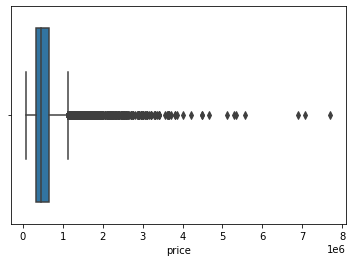

In [26]:
from numpy import mean
from numpy import std 


sns.boxplot(x=data_pred['price'])

In [27]:
price_mean, price_std = mean(data_pred.price), std(data_pred.price)

cutoff = price_std*3

lower_price, upper_price = price_mean - cutoff, price_mean + cutoff

# identify outliers 

outliers = [x for x in data_pred.price if x < lower_price or x > upper_price]

In [28]:
sorted(outliers)

[1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 1760000.0,
 1760000.0,
 1760000.0,
 1760000.0,
 1770000.0,
 1770000.0,
 1770000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1780000.0,
 1790000.0,
 1790000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 1800000.0,
 180

In [29]:
data_pred = data_pred[data_pred.price < 1660000]

In [30]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 12 columns):
price            18870 non-null float64
bedrooms         18870 non-null int64
bathrooms        18870 non-null float64
sqft_lot         18870 non-null int64
sqft_living      18870 non-null int64
floors           18870 non-null float64
waterfront       18870 non-null float64
condition        18870 non-null int64
grade            18870 non-null int64
sqft_above       18870 non-null int64
sqft_basement    18870 non-null float64
zipcode          18870 non-null int64
dtypes: float64(5), int64(7)
memory usage: 1.9 MB


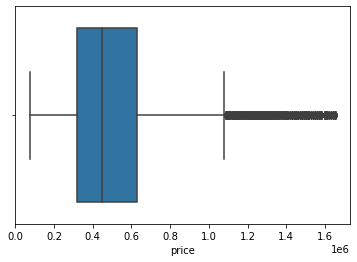

In [31]:
sns.boxplot(x=data_pred['price'])

# EDA - Visualizing the Data

Text(0.5, 0, 'Condition Rank')

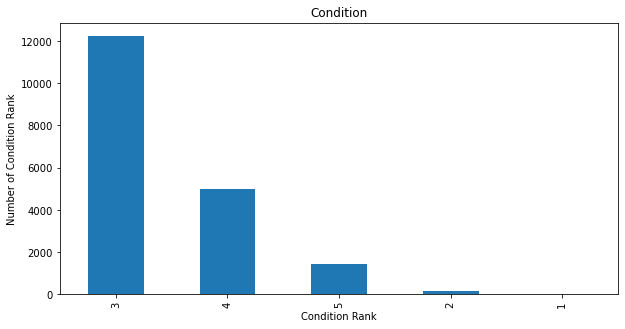

In [32]:
data_pred['condition'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Condition')
plt.ylabel('Number of Condition Rank')
plt.xlabel('Condition Rank')

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

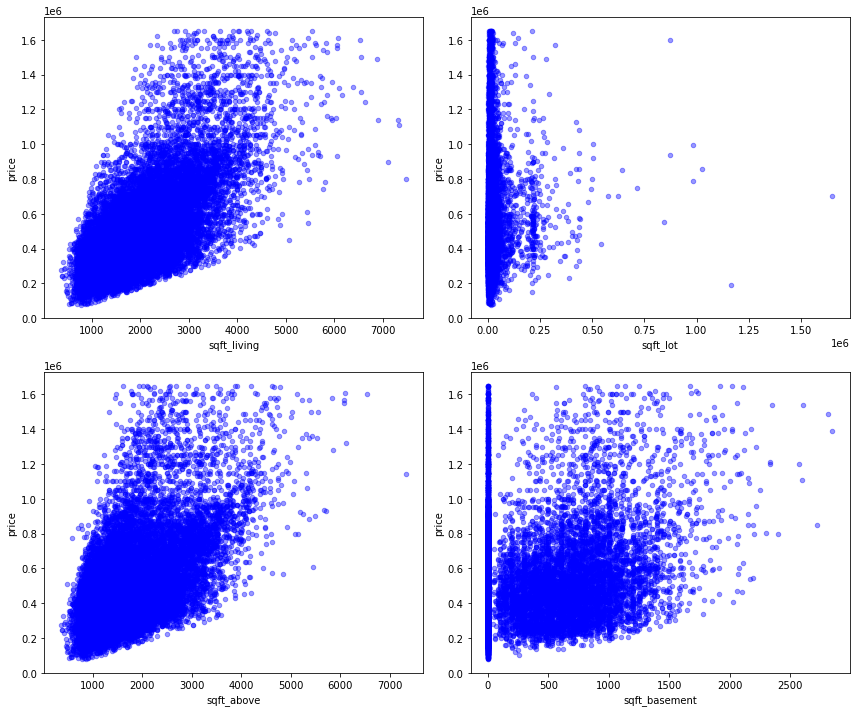

In [33]:
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' ]
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(12,10))

for xcol, ax in zip(continous, axes.flatten()):
    data_pred.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color= 'b')

fig.tight_layout()

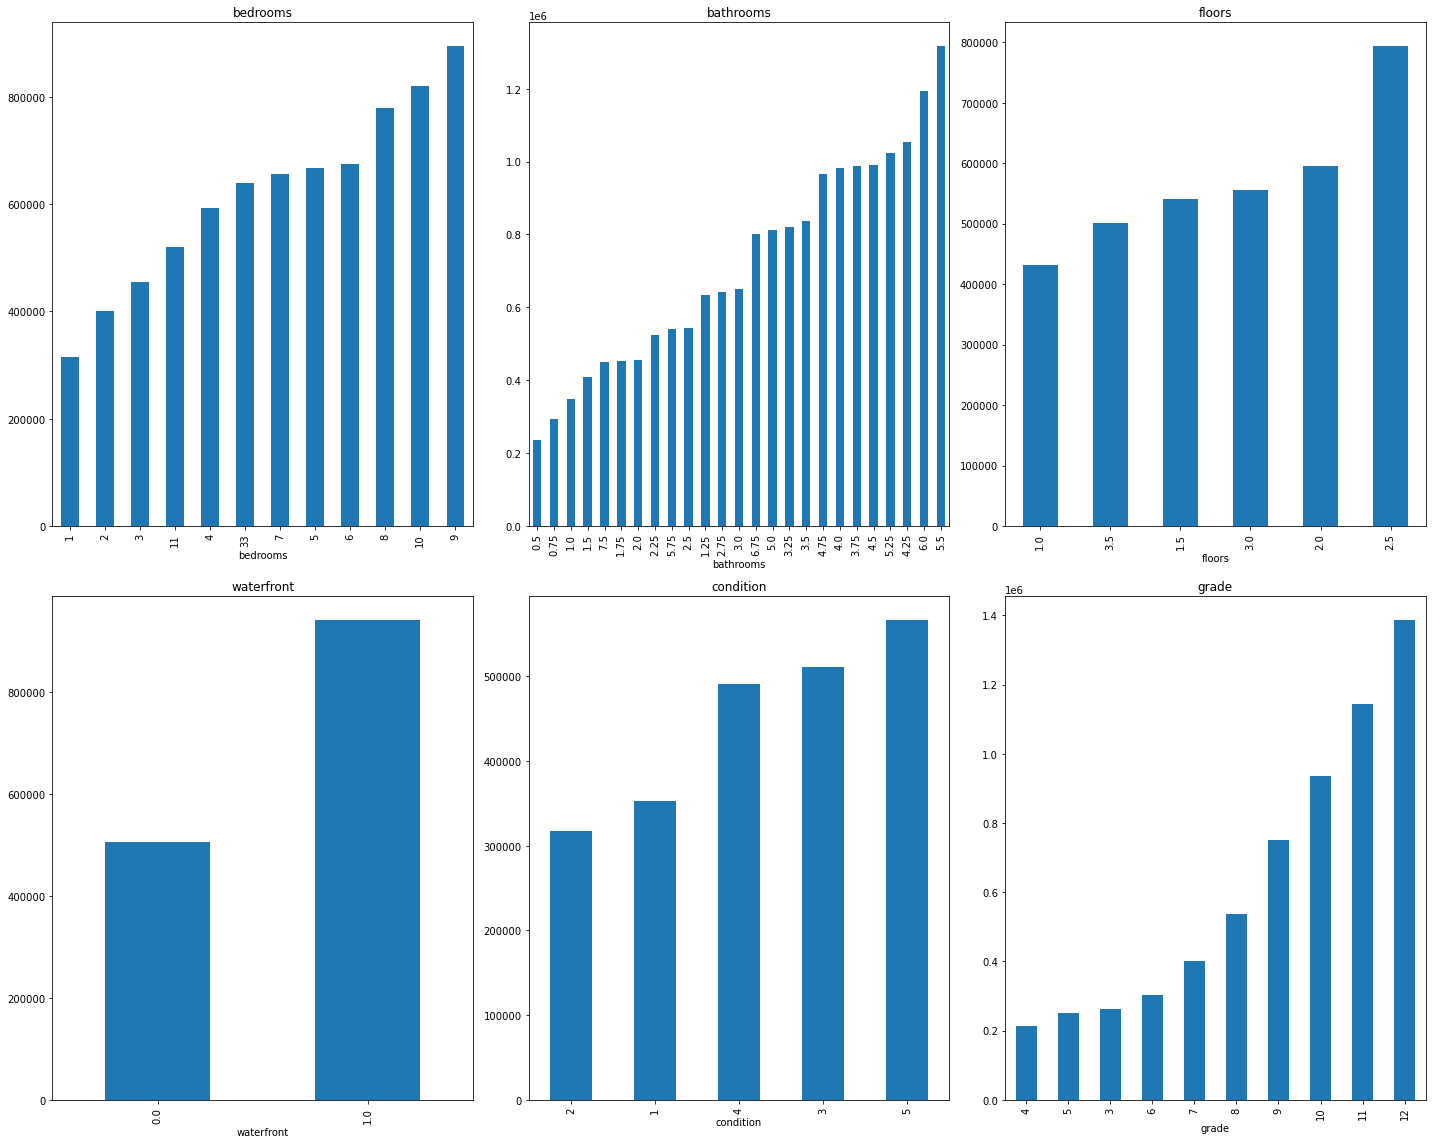

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data_pred.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax)) 
    ax.set_title(col)                
    
fig.tight_layout()

In [35]:
#**bedroomsNumber** -  of Bedrooms/House
print(data.bedrooms.unique())
print('This variable is categorical and has about',data.bedrooms.nunique(), 'unique values')

#**bathroomsNumber** -  of bathrooms/bedrooms
print(data.bathrooms.unique())
print('This variable is categorical and has about',data.bathrooms.nunique(), 'unique values')

#**floorsTotal** -  floors (levels) in house
print(data.floors.unique())
print('This variable is categorical and has about',data.floors.nunique(), 'unique values')

#**waterfront** - House which has a view to a waterfront
print(data.waterfront.unique())
print('This variable is categorical and has about',data.waterfront.nunique(), 'unique values')

#**view** - Has been viewed
print(data.view.unique())
print('This variable is categorical and has about',data.view.nunique(), 'unique values')

#**condition** - How good the condition is ( Overall )
print(data.condition.unique())
print('This variable is categorical and has about',data.condition.nunique(), 'unique values')

#**grade** - overall grade given to the housing unit, based on King County grading system
print(data.grade.unique())
print('This variable is categorical and has about',data.grade.nunique(), 'unique values')

[ 3  2  4  5  1  6  7  8  9 11 10 33]
This variable is categorical and has about 12 unique values
[2.25 1.   3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
This variable is categorical and has about 29 unique values
[2.  1.  1.5 3.  2.5 3.5]
This variable is categorical and has about 6 unique values
[0. 1.]
This variable is categorical and has about 2 unique values
[ 0. nan  3.  4.  2.  1.]
This variable is categorical and has about 5 unique values
[3 5 4 1 2]
This variable is categorical and has about 5 unique values
[ 7  6  8 11  9  5 10 12  4  3 13]
This variable is categorical and has about 11 unique values


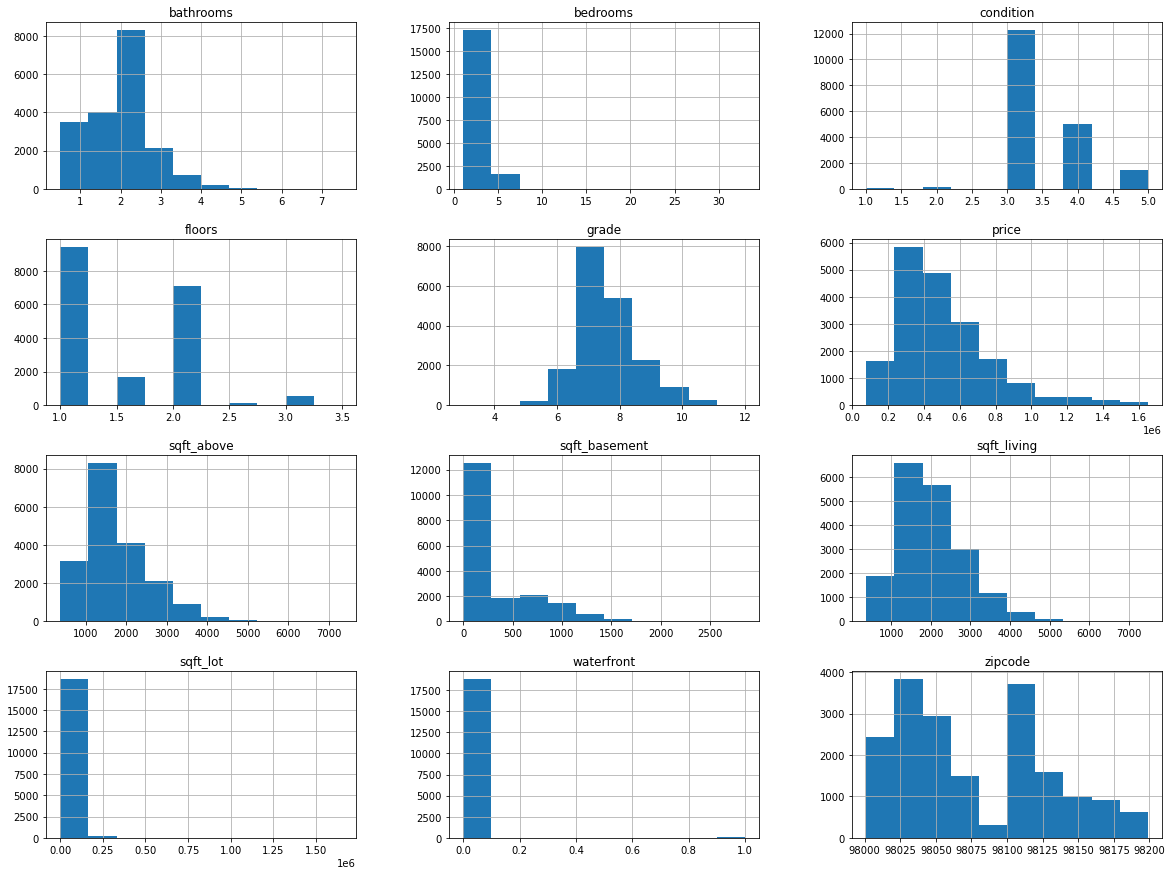

In [36]:
data_pred.hist(figsize=(20,15));

In [37]:
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes

In [38]:
kings_county = gpd.read_file('C:/Users/egust/Desktop/KingCounty/School_Districts_in_King_County___schdst_area.shp')
kings_county_schools = gpd.read_file('C:/Users/egust/Desktop/School_Sites_in_King_County___schsite_point.shp')
kings_county_cpi = gpd.read_file('C:/Users/egust/Desktop/Common_Points_of_Interest_for_King_County____common_interest_point.shp')

Text(0.5, 310.6624463974156, 'Longitude')

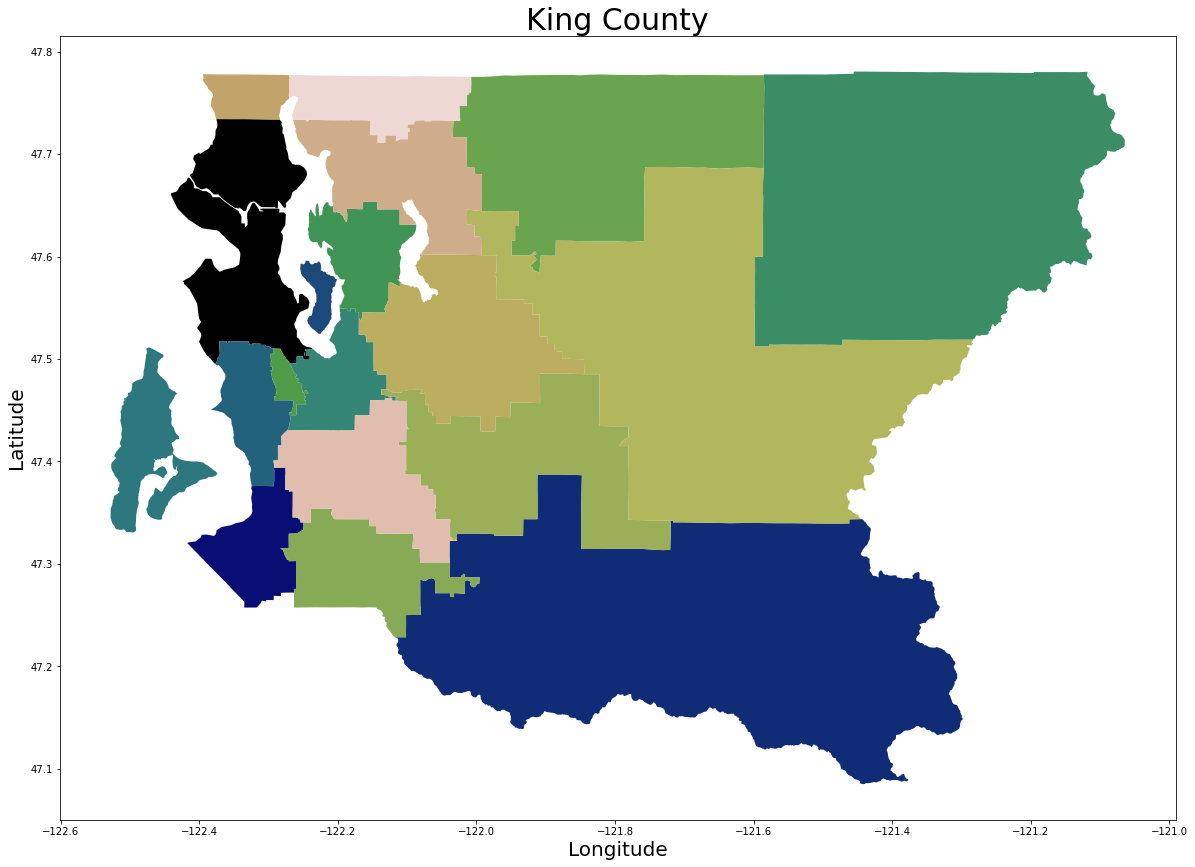

In [39]:
fig, ax = plt.subplots(figsize = (20,20))
kings_county.plot(ax=ax, cmap = 'gist_earth')
ax.set_title('King County', fontdict = {'fontsize' : 30})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

Text(0.5, 244.35793477743903, 'Longitude')

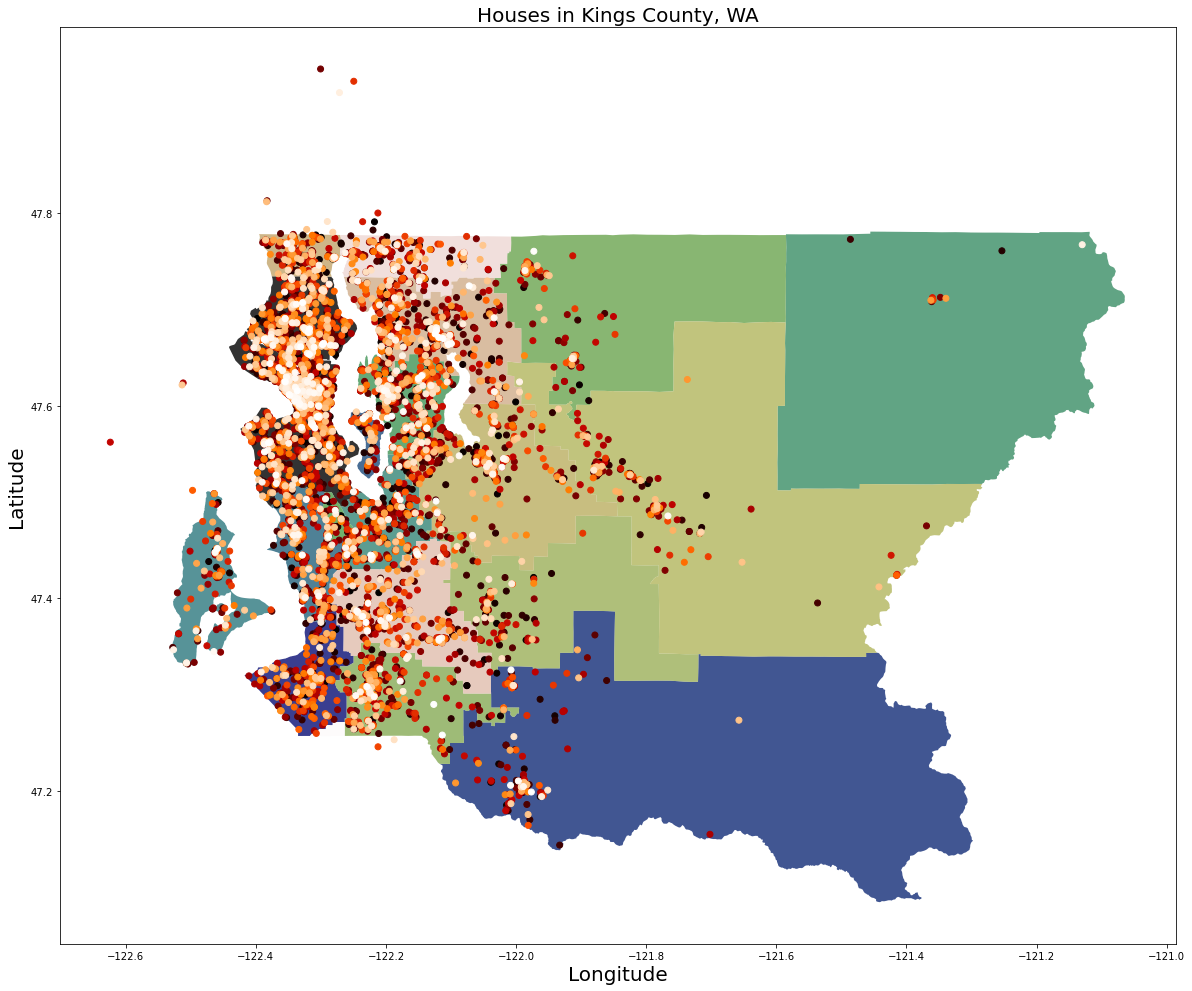

In [40]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_cpi.plot(ax=ax, cmap = 'gist_heat')

ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

Text(0.5, 310.3034246844864, 'Longitude')

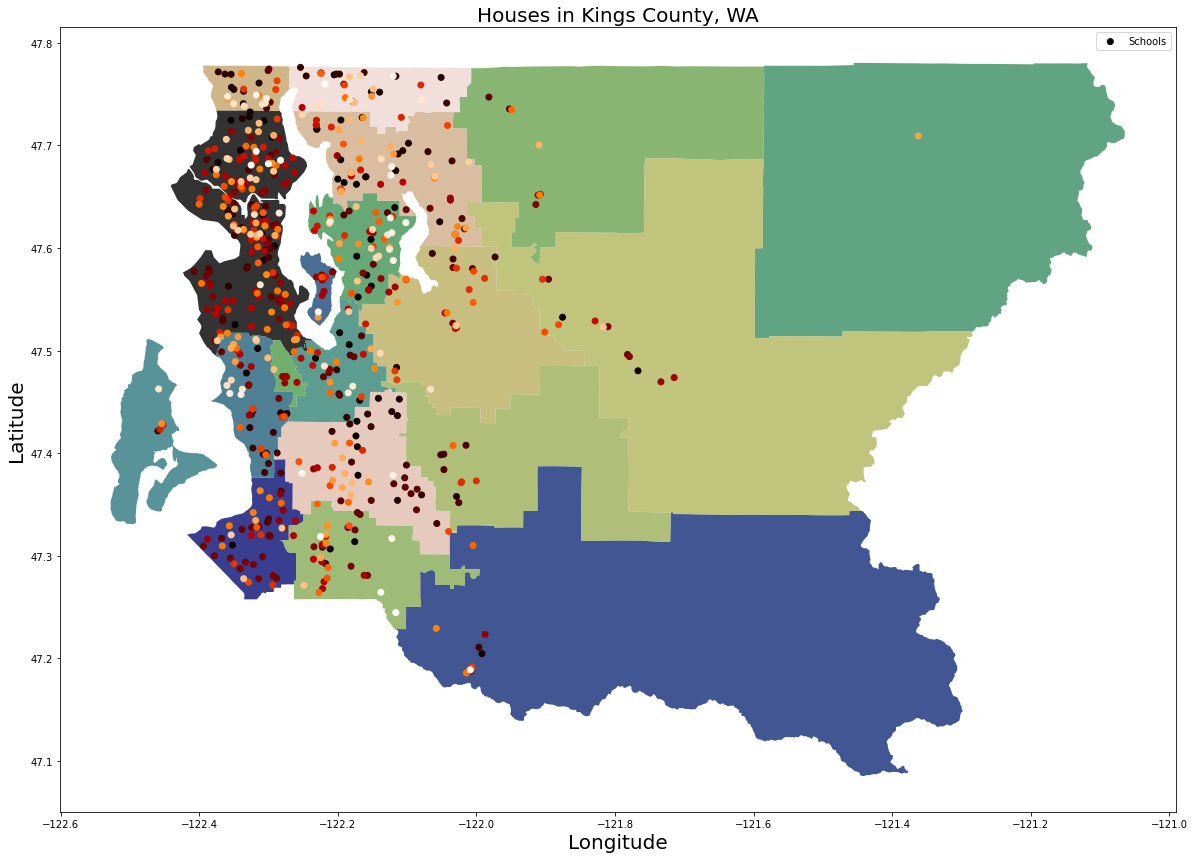

In [41]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_schools.plot(ax=ax, cmap = 'gist_heat', label = 'Schools')

plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

In [42]:
crs = {'init': 'epsg:4326'}

geometry = [Point(x,y) 
            for x,y in zip(data['long'], data['lat'])]


In [43]:
geo_data = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 437.4716900385966, 'Longitude')

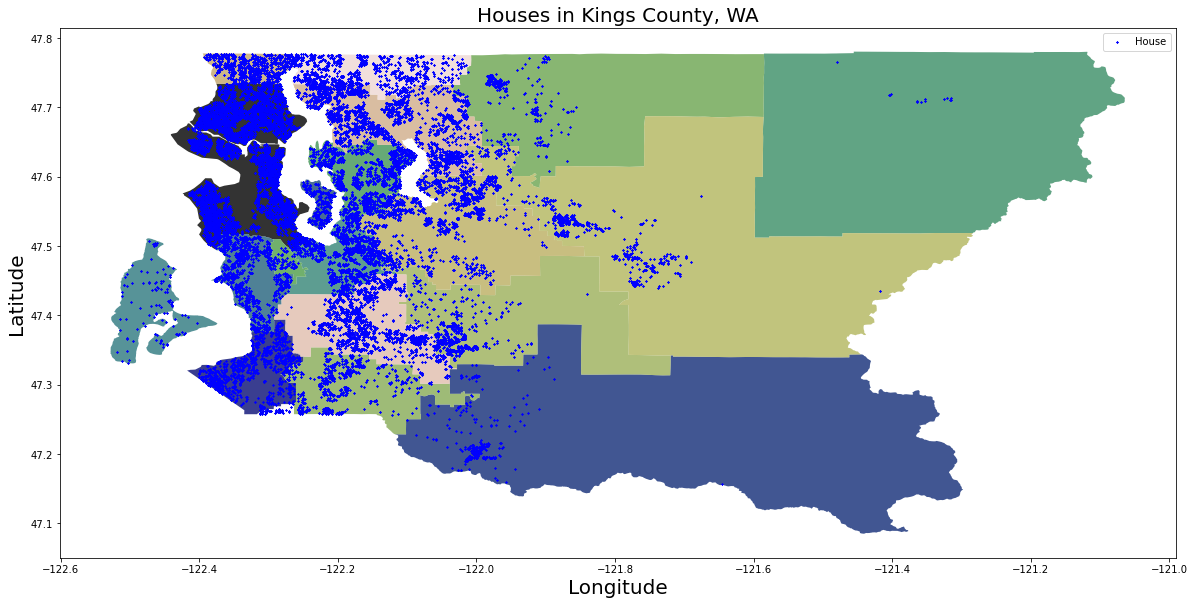

In [44]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
geo_data.plot(ax = ax , markersize = 2, color = 'blue', marker ='x', label = 'House', aspect = 1)

plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

##  Checking Assumption

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

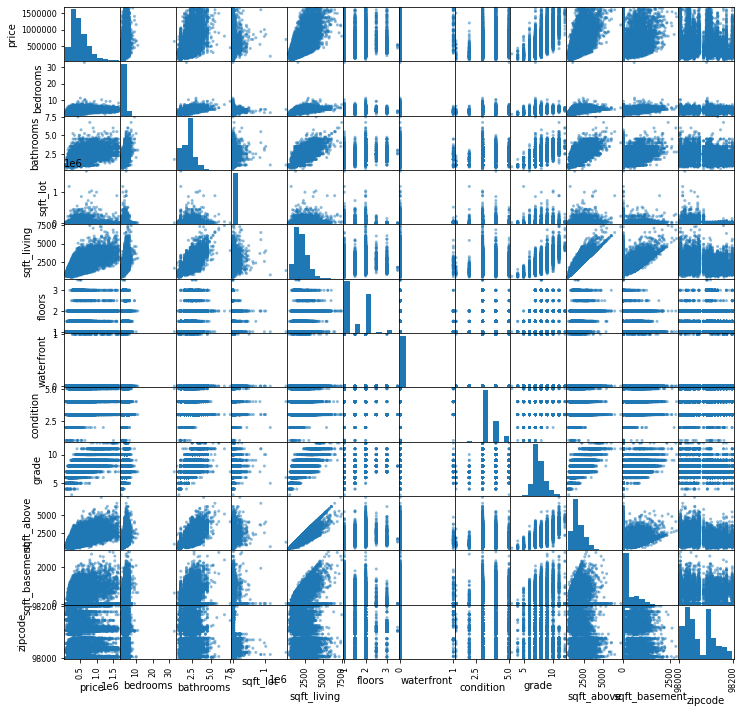

In [45]:
pd.plotting.scatter_matrix(data_pred, figsize = [12,12]);
plt.show()

In [46]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False
sqft_above,False,False,False,False,True,False,False,False,False,True,False,False


In [47]:
df= data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [48]:
df[(df.cc> .75) & (df.cc< 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.863748


## Remove sft_living

- Case for removing sqft_living
When evaluating this data you can make the argument that both the numbers of bathrooms and bedrooms can represent sqft_living


In [49]:
data_pred = data_pred.drop(columns=['sqft_living'])
data_pred.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,98125
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,98028
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,98136
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,98074
5,1230000.0,4,4.50,101930,1.0,0.0,3,11,3890,1530.0,98053


In [50]:
data_pred.nunique() < 30

price            False
bedrooms          True
bathrooms         True
sqft_lot         False
floors            True
waterfront        True
condition         True
grade             True
sqft_above       False
sqft_basement    False
zipcode          False
dtype: bool

# Categorical Features

In [51]:
cont = ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']
categorical = [ 'waterfront', 'condition', 'grade']

In [52]:
#**waterfront** - House which has a view to a waterfront
data.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

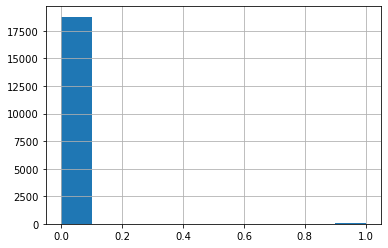

In [53]:
data_pred.waterfront.hist()

## Not including waterfront feature 
- Including the waterfront feature is not approprate in predicting the value of a property. Yes, it might be true that the value might potentially increase but that is a different analysis
    - You would need to find the features that are the same or within a few std

In [54]:
data_pred[categorical].nunique() ## should I bin the bathrooms to reduce the dimensions of the problem 

waterfront     2
condition      5
grade         10
dtype: int64

In [55]:
#for cat in categorical:
    #data_pred[cat] = data_pred[cat].astype('category')
    #data_pred[cat] = data_pred[cat].cat.codes

In [56]:
data_pred[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 3 columns):
waterfront    18870 non-null float64
condition     18870 non-null int64
grade         18870 non-null int64
dtypes: float64(1), int64(2)
memory usage: 589.7 KB


In [57]:
waterfront_dummy = pd.get_dummies(data_pred.waterfront, prefix='waterfront', drop_first=True)

In [58]:
condition_dummy = pd.get_dummies(data_pred.condition, prefix='condition', drop_first=True)

In [59]:
grade_dummy = pd.get_dummies(data_pred.grade, prefix='grade', drop_first=True)

In [60]:
processed_data = pd.concat([data_pred, waterfront_dummy, condition_dummy, grade_dummy], axis=1)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 25 columns):
price             18870 non-null float64
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
sqft_lot          18870 non-null int64
floors            18870 non-null float64
waterfront        18870 non-null float64
condition         18870 non-null int64
grade             18870 non-null int64
sqft_above        18870 non-null int64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1.0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_4       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870

In [61]:
processed_data= processed_data.drop(['waterfront', 'condition', 'grade'], axis=1)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 22 columns):
price             18870 non-null float64
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
sqft_lot          18870 non-null int64
floors            18870 non-null float64
sqft_above        18870 non-null int64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1.0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_4       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870 non-null uint8
grade_11          18870 non-null uint8
grade_12          18870 non-null uint8
dtypes: float64(4), int64

In [62]:
processed_data.columns = processed_data.columns.str.replace('.', '_')
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 22 columns):
price             18870 non-null float64
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
sqft_lot          18870 non-null int64
floors            18870 non-null float64
sqft_above        18870 non-null int64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1_0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_4       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870 non-null uint8
grade_11          18870 non-null uint8
grade_12          18870 non-null uint8
dtypes: float64(4), int64

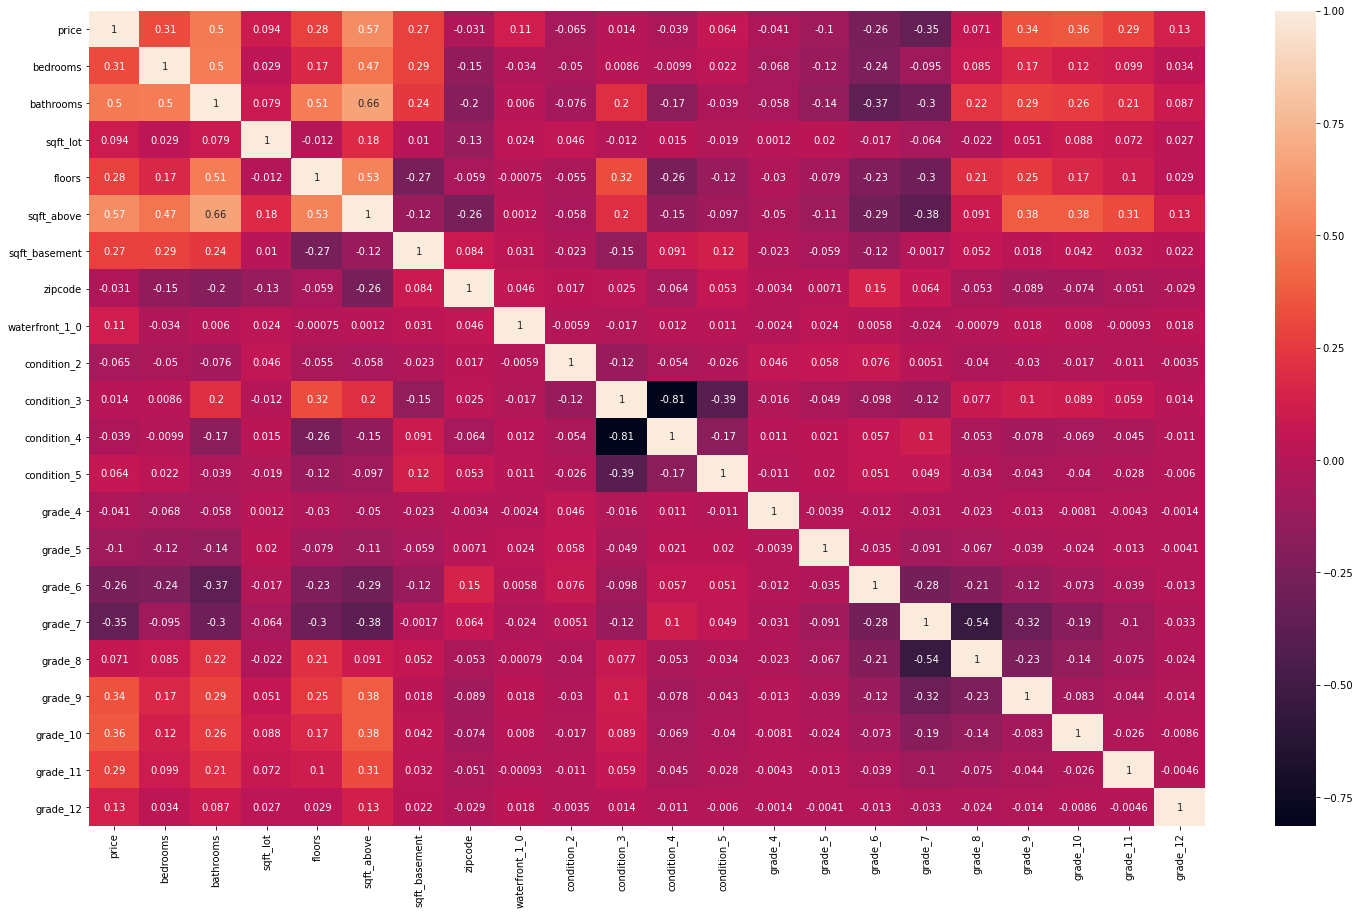

In [63]:
plt.figure(figsize=[25,15])
sns.heatmap(processed_data.corr(),annot=True)

In [64]:
abs(processed_data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,zipcode,waterfront_1_0,condition_2,...,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront_1_0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition_2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df= processed_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [66]:
df[(df.cc> .75) & (df.cc< 1)]

,cc
pairs,
"(condition_3, condition_4)",0.81444


In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data)

In [68]:
print(len(train), len(test))

14152 4718


In [69]:
outcome = 'price'
x_cols = list(processed_data.columns)
x_cols.remove(outcome)

In [70]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     881.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:00:54   Log-Likelihood:            -1.9057e+05
No. Observations:               14152   AIC:                         3.812e+05
Df Residuals:                   14130   BIC:                         3.814e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.794e+07   2.83e+06    -16.934      0.000   -5.35e+07   -4.24e+07
bedrooms       -7085.8061   1984.601     -3.570      0.000    -1.1e+04   -3195.726
bathrooms      -6026.4810   3299.624     -1.826      0.068   -1.25e+04     441.217
sqft_lot          -0.0084      0.035     -0.240      0.810      -0.077       0.060
floors          1.799e+04   3739.963      4.809      0.000    1.07e+04    2.53e+04
sqft_above        95.7206      3.694     25.909      0.000      88.479     102.962
sqft_basement    149.9174      4.560     32.876      0.000     140.979     158.856
zipcode          490.1322     28.826     17.003      0.000     433.630     546.635
waterfront_1_0  3.433e+05   2.17e+04     15.843      0.000    3.01e+05    3.86e+05
condition_2    -2.801e+04   4.14e+04     -0.676      0.499   -1.09e+05    5.32e+04
condition_3    -1.566e+04   3.86e+04     -0.406      0.685   -9.12e+04    5.99e+04
condition_4     3.414e+04   3.86e+04      0.885      0.376   -4.15e+04     1.1e+05
condition_5     1.044e+05   3.88e+04      2.689      0.007    2.83e+04    1.81e+05
grade_4         2.285e+04   1.76e+05      0.130      0.896   -3.21e+05    3.67e+05
grade_5         1.713e+04   1.71e+05      0.100      0.920   -3.19e+05    3.53e+05
grade_6         2.997e+04   1.71e+05      0.175      0.861   -3.05e+05    3.65e+05
grade_7         9.497e+04   1.71e+05      0.556      0.578    -2.4e+05     4.3e+05
grade_8         1.896e+05   1.71e+05      1.109      0.267   -1.45e+05    5.25e+05
grade_9         3.495e+05   1.71e+05      2.043      0.041    1.42e+04    6.85e+05
grade_10        4.884e+05   1.71e+05      2.853      0.004    1.53e+05    8.24e+05
grade_11        6.238e+05   1.72e+05      3.634      0.000    2.87e+05     9.6e+05
grade_12        7.149e+05   1.77e+05      4.042      0.000    3.68e+05    1.06e+06
==============================================================================
Omnibus:                     2561.397   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6918.642
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.812   Cond. No.                     1.96e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


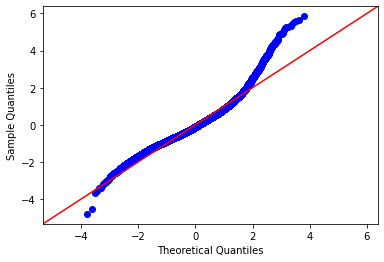

In [71]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [72]:
#Backward Elimination
y = processed_data['price']
cols = x_cols
X = processed_data[x_cols]
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement', 'zipcode', 'waterfront_1_0', 'condition_2', 'condition_3', 'condition_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12']


# Model improvement 

In [73]:
predictors_v2 = '+'.join(selected_features_BE)
formula_v2 = outcome + '~' + predictors_v2
model_v2 = ols(formula=formula_v2, data=train).fit()
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1089.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:00:55   Log-Likelihood:            -1.9057e+05
No. Observations:               14152   AIC:                         3.812e+05
Df Residuals:                   14134   BIC:                         3.813e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.792e+07   2.82e+06    -17.007      0.000   -5.34e+07   -4.24e+07
bedrooms       -7039.3509   1976.734     -3.561      0.000   -1.09e+04   -3164.692
bathrooms      -6010.1843   3299.158     -1.822      0.069   -1.25e+04     456.601
floors          1.803e+04   3725.977      4.838      0.000    1.07e+04    2.53e+04
sqft_above        95.5581      3.642     26.241      0.000      88.420     102.696
sqft_basement    149.8723      4.555     32.903      0.000     140.944     158.801
zipcode          490.4000     28.726     17.072      0.000     434.093     546.707
waterfront_1_0  3.428e+05   2.17e+04     15.828      0.000       3e+05    3.85e+05
condition_2    -6.198e+04    1.6e+04     -3.877      0.000   -9.33e+04   -3.06e+04
condition_3    -4.962e+04   3503.604    -14.162      0.000   -5.65e+04   -4.28e+04
condition_5     7.046e+04   5892.380     11.958      0.000    5.89e+04     8.2e+04
grade_6         1.353e+04   1.35e+04      1.003      0.316   -1.29e+04       4e+04
grade_7         7.876e+04    1.3e+04      6.036      0.000    5.32e+04    1.04e+05
grade_8         1.735e+05   1.35e+04     12.862      0.000    1.47e+05       2e+05
grade_9         3.333e+05   1.44e+04     23.121      0.000    3.05e+05    3.62e+05
grade_10        4.722e+05    1.6e+04     29.463      0.000    4.41e+05    5.04e+05
grade_11        6.077e+05   2.01e+04     30.263      0.000    5.68e+05    6.47e+05
grade_12        6.989e+05   4.72e+04     14.807      0.000    6.06e+05    7.91e+05
==============================================================================
Omnibus:                     2562.387   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6924.442
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.813   Cond. No.                     1.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Normalization to improve model

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

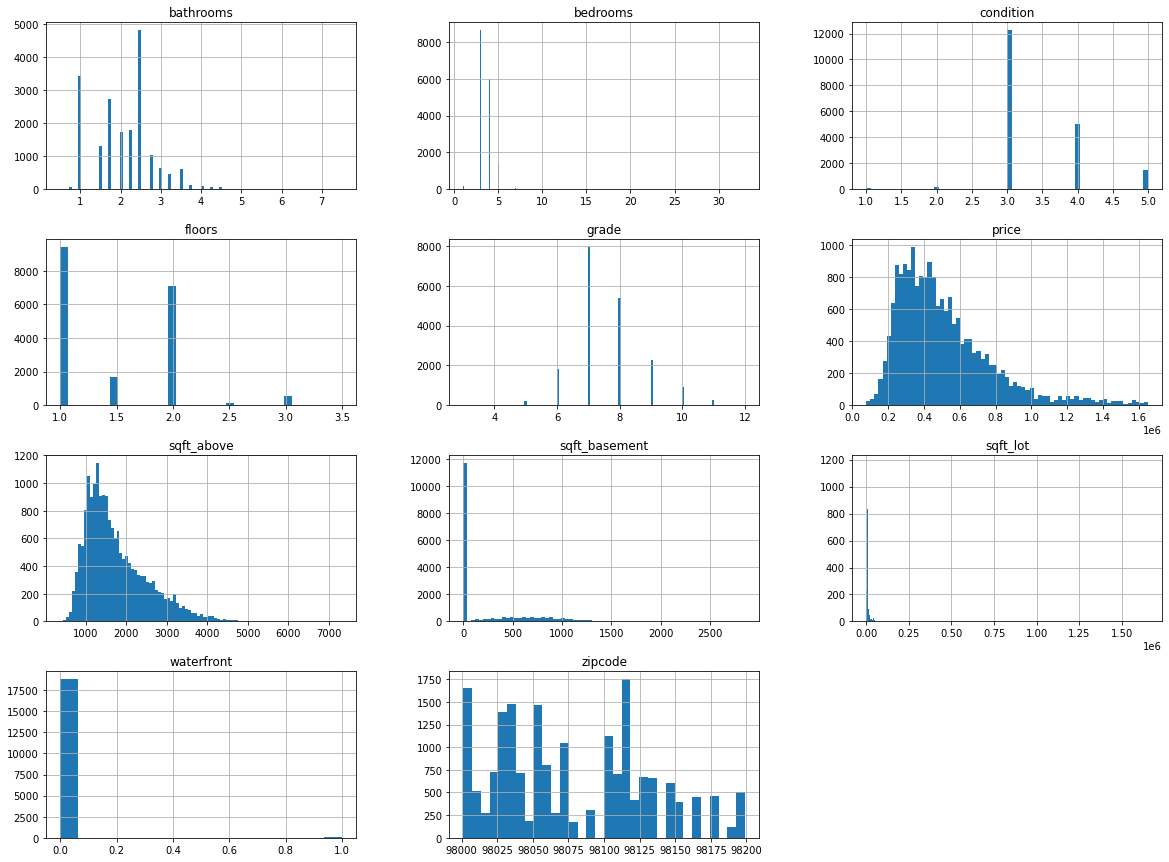

In [74]:
data_pred.hist(figsize=(20,15), bins='auto');

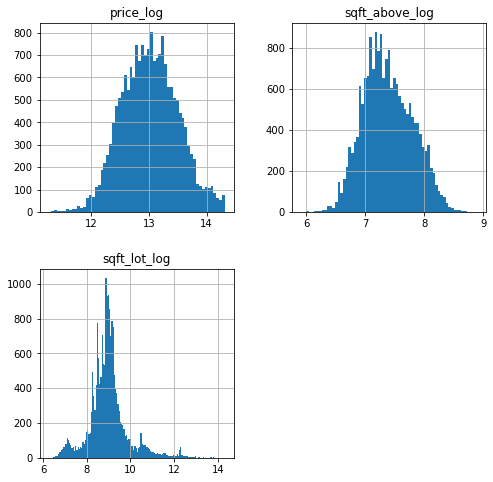

In [75]:
data_pred_cont = data_pred[['price', 'sqft_above', 'sqft_lot']]
log_names = [f'{column}_log' for column in data_pred_cont.columns]

data_pc_log = np.log(data_pred_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AEDB7DB38>,
      dtype=object)

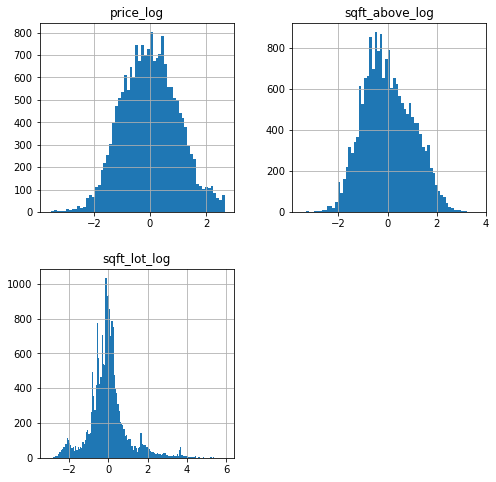

In [76]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_pc_log.apply(normalize)

features_final.hist(figsize  = [8, 8], bins= 'auto')

In [77]:
processed_data_norm = pd.concat([processed_data, features_final], axis=1)
processed_data_norm= processed_data_norm.drop(['price', 'sqft_above', 'sqft_lot'], axis=1)


In [78]:
processed_data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 1 to 21596
Data columns (total 22 columns):
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
floors            18870 non-null float64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1_0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_4       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870 non-null uint8
grade_11          18870 non-null uint8
grade_12          18870 non-null uint8
price_log         18870 non-null float64
sqft_above_log    18870 non-null float64
sqft_lot_log      18870 non-null float64
dtypes: float64(6), i

In [79]:
train_norm, test_norm = train_test_split(processed_data_norm)

In [80]:
outcome = 'price_log'
x_cols = list(processed_data_norm.columns)
x_cols.remove(outcome)

In [81]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     797.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:01:31   Log-Likelihood:                -14516.
No. Observations:               14152   AIC:                         2.908e+04
Df Residuals:                   14130   BIC:                         2.924e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -210.0649     11.408    -18.414      0.000    -232.426    -187.704
bedrooms          -0.0285      0.008     -3.599      0.000      -0.044      -0.013
bathrooms         -0.0191      0.013     -1.479      0.139      -0.044       0.006
floors             0.0237      0.016      1.451      0.147      -0.008       0.056
sqft_basement      0.0006   1.76e-05     31.479      0.000       0.001       0.001
zipcode            0.0021      0.000     18.403      0.000       0.002       0.002
waterfront_1_0     1.0132      0.090     11.218      0.000       0.836       1.190
condition_2       -0.2955      0.155     -1.909      0.056      -0.599       0.008
condition_3       -0.1225      0.143     -0.858      0.391      -0.402       0.157
condition_4        0.0704      0.143      0.493      0.622      -0.210       0.350
condition_5        0.2877      0.144      1.999      0.046       0.006       0.570
grade_4           -0.6195      0.693     -0.894      0.371      -1.977       0.738
grade_5           -0.5295      0.678     -0.781      0.435      -1.859       0.800
grade_6           -0.2879      0.676     -0.426      0.670      -1.614       1.038
grade_7            0.1020      0.676      0.151      0.880      -1.224       1.428
grade_8            0.5208      0.677      0.770      0.441      -0.805       1.847
grade_9            1.0655      0.677      1.574      0.116      -0.261       2.392
grade_10           1.4124      0.678      2.085      0.037       0.084       2.740
grade_11           1.7842      0.679      2.628      0.009       0.453       3.115
grade_12           1.9480      0.695      2.803      0.005       0.586       3.310
sqft_above_log     0.3096      0.012     25.741      0.000       0.286       0.333
sqft_lot_log      -0.0614      0.007     -8.447      0.000      -0.076      -0.047
==============================================================================
Omnibus:                        4.190   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.177
Skew:                           0.042   Prob(JB):                        0.124
Kurtosis:                       3.008   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Backward Elimination
y = processed_data_norm['price_log']
cols = x_cols
X = processed_data_norm[x_cols]
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_norm = cols
print(selected_features_BE_norm)

['bedrooms', 'sqft_basement', 'zipcode', 'waterfront_1_0', 'condition_2', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'sqft_above_log', 'sqft_lot_log']


In [83]:
predictors_vnorm2 = '+'.join(selected_features_BE_norm)
formula_vnorm2 = outcome + '~' + predictors_vnorm2
model_vnorm2 = ols(formula=formula_vnorm2, data=train_norm).fit()
model_vnorm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     985.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:01:32   Log-Likelihood:                -14518.
No. Observations:               14152   AIC:                         2.907e+04
Df Residuals:                   14134   BIC:                         2.921e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -212.4693     11.314    -18.780      0.000    -234.646    -190.293
bedrooms          -0.0305      0.008     -3.907      0.000      -0.046      -0.015
sqft_basement      0.0005   1.58e-05     34.222      0.000       0.001       0.001
zipcode            0.0022      0.000     18.744      0.000       0.002       0.002
waterfront_1_0     1.0156      0.090     11.254      0.000       0.839       1.192
condition_2       -0.1730      0.063     -2.733      0.006      -0.297      -0.049
condition_4        0.1920      0.014     14.043      0.000       0.165       0.219
condition_5        0.4074      0.022     18.513      0.000       0.364       0.451
grade_4           -0.7103      0.153     -4.656      0.000      -1.009      -0.411
grade_5           -0.6205      0.057    -10.861      0.000      -0.732      -0.509
grade_6           -0.3861      0.022    -17.841      0.000      -0.428      -0.344
grade_8            0.4188      0.015     27.476      0.000       0.389       0.449
grade_9            0.9635      0.023     41.935      0.000       0.918       1.009
grade_10           1.3085      0.033     39.429      0.000       1.243       1.374
grade_11           1.6757      0.053     31.560      0.000       1.572       1.780
grade_12           1.8356      0.158     11.654      0.000       1.527       2.144
sqft_above_log     0.3093      0.010     29.531      0.000       0.289       0.330
sqft_lot_log      -0.0640      0.006     -9.944      0.000      -0.077      -0.051
==============================================================================
Omnibus:                        4.501   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.489
Skew:                           0.043   Prob(JB):                        0.106
Kurtosis:                       3.008   Cond. No.                     1.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


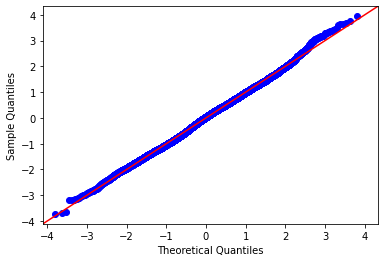

In [84]:
residuals_vnorm2 = model_vnorm2.resid
fig = sm.graphics.qqplot(residuals_vnorm2, dist=stats.norm, line='45', fit=True)
fig.show()

# Modified Model version 2 

In [85]:
data_pred

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,98125
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,98028
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,98136
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,98074
5,1230000.0,4,4.50,101930,1.0,0.0,3,11,3890,1530.0,98053
...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1294,2.0,0.0,3,8,1180,130.0,98116
21592,360000.0,3,2.50,1131,3.0,0.0,3,8,1530,0.0,98103
21593,400000.0,4,2.50,5813,2.0,0.0,3,8,2310,0.0,98146
21594,402101.0,2,0.75,1350,2.0,0.0,3,7,1020,0.0,98144


In [ ]:
## adding the school district, with grading ranks, size of school and student size 

## Create functions that 

In [138]:
kc_school_district = pd.read_csv('kc_school_district.csv')

In [140]:
kc_school_district.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
kc_school_district

,district,grade,total_sch,total_student,zipcode,grade_num
0,mercer island,A+,6,"4,522",[98040],13
1,lake washington,A+,55,"30,675","[98028, 98033, 98034, 98052, 98053, 98074, 98077]",13
2,issaquah,A+,27,"20,897","[98006, 98008, 98027, 98029, 98059, 98065, 98075]",13
3,bellevue,A+,31,"21,609","[98004, 98005, 98006, 98007, 98008, 98039, 98121]",13
4,vashon island,A,5,"1,585",[98070],12
5,northshore,A,39,23500,"[98011, 98028, 98052, 98072, 98077]",12
6,shoreline,A,19,"9,899","[98133, 98155, 98177]",12
7,tahoma,A,9,"8,906","[98038, 98042, 98051]",12
8,snoqualmie valley,A-,13,"7,214","[98024, 98045, 98065]",11
9,seattle,A-,108,"55,271","[98101, 98102, 98103, 98104, 98105, 98106, 981...",11


In [144]:
kc_school_district['zipcode'][6]

[98133, 98155, 98177]

In [143]:
import ast
for key in range(len(kc_school_district['zipcode'])):
    kc_school_district['zipcode'][key] = ast.literal_eval(kc_school_district['zipcode'][key])

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: malformed node or string: nan

In [166]:
def district(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                district = kc_school_district['district'][key]
    except Exception:
        pass
    return district

In [167]:
def districts(zipcodes):
    try:
        x = district(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [147]:
districts(98288)

'skykomish'

In [168]:
district_KC = []
for zipcode in data_pred['zipcode']:
    district_KC.append(districts(zipcode))

In [169]:
def grade(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade = kc_school_district['grade'][key]
    except Exception:
        pass
    return grade

In [170]:
def grades(zipcodes):
    try:
        x = grade(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [171]:
grades_KC = []
for zipcode in data_pred['zipcode']:
    grades_KC.append(grades(zipcode))

In [172]:
def total_sch(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_sch = kc_school_district['total_sch'][key]
    except Exception:
        pass
    return total_sch

In [173]:
def total_schs(zipcodes):
    try:
        x = total_sch(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [174]:
total_schs_KC = []
for zipcode in data_pred['zipcode']:
    total_schs_KC.append(total_schs(zipcode))

In [175]:
def total_student(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_student = kc_school_district['total_student'][key]
    except Exception:
        pass
    return total_student

In [176]:
def total_students(zipcodes):
    try:
        x = total_student(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [177]:
total_student_KC = []
for zipcode in data_pred['zipcode']:
    total_student_KC.append(total_students(zipcode))

In [178]:
def grade_num(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade_num = kc_school_district['grade_num'][key]
    except Exception:
        pass
    return grade_num

In [179]:
def grade_nums(zipcodes):
    try:
        x = grade_num(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [180]:
grade_nums_KC = []
for zipcode in data_pred['zipcode']:
    grade_nums_KC.append(grade_nums(zipcode))

In [221]:
x = {'district': district_KC, 
     'grades': grades_KC,
     'grade_num': grade_nums_KC,
     'total_sch': total_schs_KC,
     'total_student': total_student_KC} 

In [222]:
df_school_district = pd.DataFrame(x, columns = ['district','grades','grade_num','total_sch','total_student'])
df_school_district

,district,grades,grade_num,total_sch,total_student
0,seattle,A-,11,108,"55,271"
1,northshore,A,12,39,23500
2,seattle,A-,11,108,"55,271"
3,lake washington,A+,13,55,"30,675"
4,lake washington,A+,13,55,"30,675"
...,...,...,...,...,...
19216,seattle,A-,11,108,"55,271"
19217,seattle,A-,11,108,"55,271"
19218,highline,C+,7,40,"19,213"
19219,seattle,A-,11,108,"55,271"


In [233]:
data_pred = pd.concat([data_pred, df_school_district], axis=1)
data_pred

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,district,grades,grade_num,total_sch,total_student
0,538000.0,3,2.25,7242,2570,2.0,0.0,3,7,2170,400.0,98125,seattle,A-,11,108,"55,271"
1,180000.0,2,1.00,10000,770,1.0,0.0,3,6,770,0.0,98028,northshore,A,12,39,23500
2,604000.0,4,3.00,5000,1960,1.0,0.0,5,7,1050,910.0,98136,seattle,A-,11,108,"55,271"
3,510000.0,3,2.00,8080,1680,1.0,0.0,3,8,1680,0.0,98074,lake washington,A+,13,55,"30,675"
4,1230000.0,4,4.50,101930,5420,1.0,0.0,3,11,3890,1530.0,98053,lake washington,A+,13,55,"30,675"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,475000.0,3,2.50,1294,1310,2.0,0.0,3,8,1180,130.0,98116,seattle,A-,11,108,"55,271"
19217,360000.0,3,2.50,1131,1530,3.0,0.0,3,8,1530,0.0,98103,seattle,A-,11,108,"55,271"
19218,400000.0,4,2.50,5813,2310,2.0,0.0,3,8,2310,0.0,98146,highline,C+,7,40,"19,213"
19219,402101.0,2,0.75,1350,1020,2.0,0.0,3,7,1020,0.0,98144,seattle,A-,11,108,"55,271"


# Dealing with Outliers


### Removing values that fall outside of 3 std of the mean

In [228]:
price_mean, price_std = mean(data_pred.price), std(data_pred.price)

cutoff = price_std*3

lower_price, upper_price = price_mean - cutoff, price_mean + cutoff

# identify outliers 

outliers = [x for x in data_pred.price if x < lower_price or x > upper_price]

In [229]:
data_pred = data_pred[data_pred.price < 1660000]

In [234]:
data_pred = data_pred.drop(columns=['grades'])
data_pred.head()

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,district,grade_num,total_sch,total_student
0,538000.0,3,2.25,7242,2570,2.0,0.0,3,7,2170,400.0,98125,seattle,11,108,"55,271"
1,180000.0,2,1.00,10000,770,1.0,0.0,3,6,770,0.0,98028,northshore,12,39,23500
2,604000.0,4,3.00,5000,1960,1.0,0.0,5,7,1050,910.0,98136,seattle,11,108,"55,271"
3,510000.0,3,2.00,8080,1680,1.0,0.0,3,8,1680,0.0,98074,lake washington,13,55,"30,675"
4,1230000.0,4,4.50,101930,5420,1.0,0.0,3,11,3890,1530.0,98053,lake washington,13,55,"30,675"


# Categorical Features

In [235]:
data_pred.nunique() < 30

price            False
bedrooms          True
bathrooms         True
sqft_lot         False
sqft_living      False
floors            True
waterfront        True
condition         True
grade             True
sqft_above       False
sqft_basement    False
zipcode          False
district          True
grade_num         True
total_sch         True
total_student     True
dtype: bool

In [236]:
cont = ['price', 'sqft_lot','waterfront', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'total_sch', 'total_student']
categorical = [ 'condition', 'grade', 'grade_num', 'district']

In [237]:
data_pred[categorical].nunique()

condition     5
grade        11
grade_num     7
district     18
dtype: int64

In [238]:
condition_dummy = pd.get_dummies(data_pred.condition, prefix='condition', drop_first=True)
grade_dummy = pd.get_dummies(data_pred.grade, prefix='grade', drop_first=True)
grade_num_dummy = pd.get_dummies(data_pred.grade_num, prefix='grade_num', drop_first=True)
district_dummy = pd.get_dummies(data_pred.district, prefix='district', drop_first=True)

processed_data = pd.concat([data_pred, condition_dummy, grade_dummy, grade_num_dummy, district_dummy], axis=1)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 53 columns):
price                         19221 non-null float64
bedrooms                      19221 non-null int64
bathrooms                     19221 non-null float64
sqft_lot                      19221 non-null int64
sqft_living                   19221 non-null int64
floors                        19221 non-null float64
waterfront                    19221 non-null float64
condition                     19221 non-null int64
grade                         19221 non-null int64
sqft_above                    19221 non-null int64
sqft_basement                 19221 non-null float64
zipcode                       19221 non-null int64
district                      19221 non-null object
grade_num                     19221 non-null int64
total_sch                     19221 non-null int64
total_student                 19221 non-null object
condition_2                   19221 non-null uint8
condition_3 

In [239]:
processed_data= processed_data.drop(['condition', 'grade','grade_num', 'district'], axis=1)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 49 columns):
price                         19221 non-null float64
bedrooms                      19221 non-null int64
bathrooms                     19221 non-null float64
sqft_lot                      19221 non-null int64
sqft_living                   19221 non-null int64
floors                        19221 non-null float64
waterfront                    19221 non-null float64
sqft_above                    19221 non-null int64
sqft_basement                 19221 non-null float64
zipcode                       19221 non-null int64
total_sch                     19221 non-null int64
total_student                 19221 non-null object
condition_2                   19221 non-null uint8
condition_3                   19221 non-null uint8
condition_4                   19221 non-null uint8
condition_5                   19221 non-null uint8
grade_4                       19221 non-null uint8
grade_5      

In [240]:
processed_data.columns = processed_data.columns.str.replace(' ', '_')
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 49 columns):
price                         19221 non-null float64
bedrooms                      19221 non-null int64
bathrooms                     19221 non-null float64
sqft_lot                      19221 non-null int64
sqft_living                   19221 non-null int64
floors                        19221 non-null float64
waterfront                    19221 non-null float64
sqft_above                    19221 non-null int64
sqft_basement                 19221 non-null float64
zipcode                       19221 non-null int64
total_sch                     19221 non-null int64
total_student                 19221 non-null object
condition_2                   19221 non-null uint8
condition_3                   19221 non-null uint8
condition_4                   19221 non-null uint8
condition_5                   19221 non-null uint8
grade_4                       19221 non-null uint8
grade_5      

# Checking Assumption

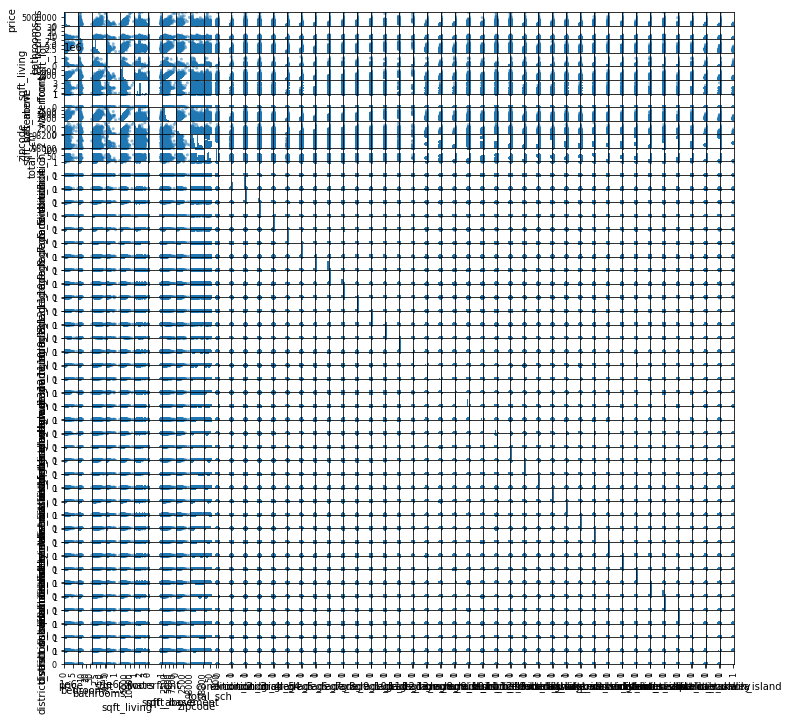

In [241]:
pd.plotting.scatter_matrix(processed_data, figsize = [12,12]);
plt.show()

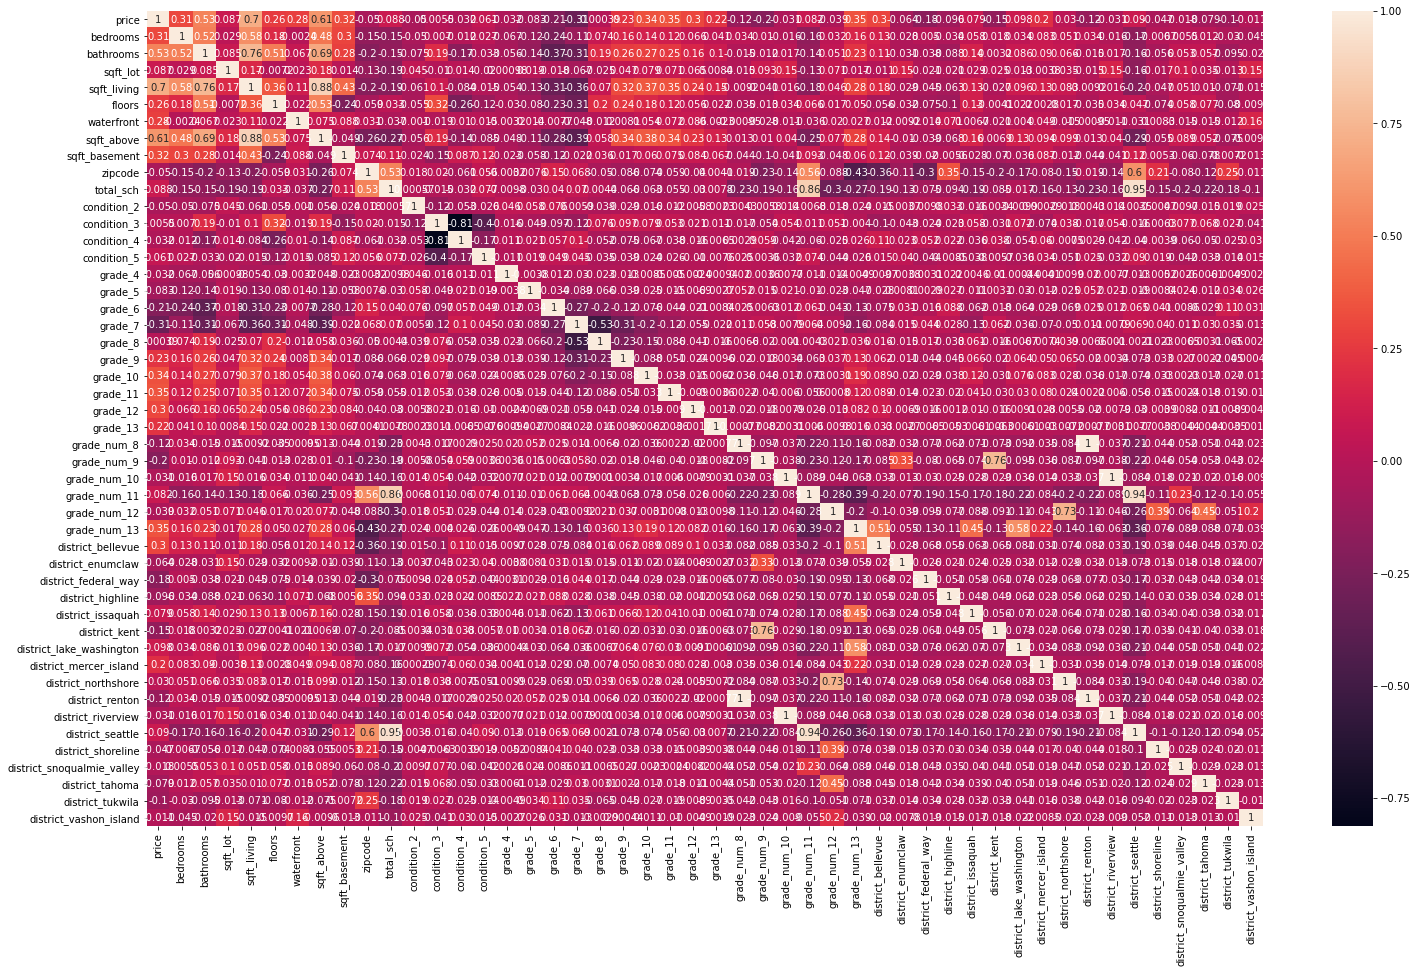

In [242]:
plt.figure(figsize=[25,15])
sns.heatmap(processed_data.corr(),annot=True)

In [244]:
abs(processed_data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,...,district_mercer_island,district_northshore,district_renton,district_riverview,district_seattle,district_shoreline,district_snoqualmie_valley,district_tahoma,district_tukwila,district_vashon_island
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [245]:
df= processed_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [246]:
df[(df.cc> .75) & (df.cc< 1)]

,cc
pairs,
"(district_seattle, total_sch)",0.948809
"(district_seattle, grade_num_11)",0.938989
"(sqft_above, sqft_living)",0.877527
"(total_sch, grade_num_11)",0.859534
"(condition_4, condition_3)",0.812567
"(grade_num_9, district_kent)",0.760295
"(sqft_living, bathrooms)",0.756341


In [248]:
processed_data= processed_data.drop(['district_seattle', 'district_kent', 'total_sch', 'sqft_living', 'condition_4'], axis=1)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 44 columns):
price                         19221 non-null float64
bedrooms                      19221 non-null int64
bathrooms                     19221 non-null float64
sqft_lot                      19221 non-null int64
floors                        19221 non-null float64
waterfront                    19221 non-null float64
sqft_above                    19221 non-null int64
sqft_basement                 19221 non-null float64
zipcode                       19221 non-null int64
total_student                 19221 non-null object
condition_2                   19221 non-null uint8
condition_3                   19221 non-null uint8
condition_5                   19221 non-null uint8
grade_4                       19221 non-null uint8
grade_5                       19221 non-null uint8
grade_6                       19221 non-null uint8
grade_7                       19221 non-null uint8
grade_8      

In [249]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data)
print(len(train), len(test))

14415 4806


In [251]:
outcome = 'price'
x_cols = list(processed_data.columns)
x_cols.remove(outcome)

##
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1144.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:23:52   Log-Likelihood:            -1.9545e+05
No. Observations:               14415   AIC:                         3.910e+05
Df Residuals:                   14376   BIC:                         3.913e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.349e+07   5.83e+06      5.742      0.000    2.21e+07    4.49e+07
total_student[T.16,425]     2.279e+06      4e+05      5.699      0.000    1.49e+06    3.06e+06
total_student[T.17,505]     1.921e+06   3.43e+05      5.594      0.000    1.25e+06    2.59e+06
total_student[T.19,213]     3.447e+06   6.03e+05      5.716      0.000    2.27e+06    4.63e+06
total_student[T.20,897]     1.104e+06      2e+05      5.527      0.000    7.13e+05     1.5e+06
total_student[T.21,609]     1.217e+06   1.98e+05      6.133      0.000    8.28e+05    1.61e+06
total_student[T.23,489]     3.371e+06   5.98e+05      5.641      0.000     2.2e+06    4.54e+06
total_student[T.23500]      1.015e+06    1.7e+05      5.954      0.000    6.81e+05    1.35e+06
total_student[T.27,291]     1.936e+06   3.42e+05      5.668      0.000    1.27e+06    2.61e+06
total_student[T.3,046]      3.441e+06   6.03e+05      5.703      0.000    2.26e+06    4.62e+06
total_student[T.3,482]      2.282e+06   3.98e+05      5.727      0.000     1.5e+06    3.06e+06
total_student[T.30,675]     1.136e+06      2e+05      5.683      0.000    7.44e+05    1.53e+06
total_student[T.4,183]      9.756e+05    1.7e+05      5.724      0.000    6.42e+05    1.31e+06
total_student[T.4,522]      1.261e+06      2e+05      6.318      0.000     8.7e+05    1.65e+06
total_student[T.55,271]     2.892e+06   4.82e+05      5.997      0.000    1.95e+06    3.84e+06
total_student[T.7,214]      1.327e+06   2.39e+05      5.563      0.000     8.6e+05    1.79e+06
total_student[T.8,906]      9.485e+05    1.7e+05      5.576      0.000    6.15e+05    1.28e+06
total_student[T.9,899]      1.031e+06   1.74e+05      5.916      0.000     6.9e+05    1.37e+06
bedrooms                   -1.772e+04   2307.092     -7.680      0.000   -2.22e+04   -1.32e+04
bathrooms                   1.898e+04   3563.868      5.325      0.000     1.2e+04     2.6e+04
sqft_lot                       0.0725      0.043      1.678      0.093      -0.012       0.157
floors                     -2.326e+04   4215.840     -5.518      0.000   -3.15e+04    -1.5e+04
waterfront                  8.017e+05   1.89e+04     42.371      0.000    7.65e+05    8.39e+05
sqft_above                   183.9155      4.022     45.725      0.000     176.031     191.799
sqft_basement                151.1064      4.775     31.647      0.000     141.747     160.466
zipcode                     -409.5228     71.674     -5.714      0.000    -550.014    -269.032
condition_2                -4.291e+04   1.81e+04     -2.369      0.018   -7.84e+04   -7400.638
condition_3                -4.194e+04   3856.619    -10.874      0.000   -4.95e+04   -3.44e+04
condition_5                 5.788e+04   6484.012      8.926      0.000    4.52e+04    7.06e+04
grade_4                    -7.111e+04   1.9